In [2]:
!wget -O weather.csv  https://www.dropbox.com/s/ck7hxhf8tzpv4q3/weather.csv?dl=0
!wget -O police.csv https://www.dropbox.com/s/dp8hmgtohp3fise/police.csv?dl=0

--2022-01-27 00:08:01--  https://www.dropbox.com/s/ck7hxhf8tzpv4q3/weather.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ck7hxhf8tzpv4q3/weather.csv [following]
--2022-01-27 00:08:01--  https://www.dropbox.com/s/raw/ck7hxhf8tzpv4q3/weather.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ec6adb1a2acaf5855130a6eeb.dl.dropboxusercontent.com/cd/0/inline/BejPTSTfidNuMGq6iNOKVr7zVd-wAaQbIqS0h7PfcTwzE6HkRwJTrKgw-B8AZ89fVCdL6a2lza1k7N1aU_IPvRGOSye6rvypYsASF858Io4_7oVmLbEDWtp-JsmshOaPv-1523MgKYdVSYb63ly8pZrp/file# [following]
--2022-01-27 00:08:01--  https://uc9ec6adb1a2acaf5855130a6eeb.dl.dropboxusercontent.com/cd/0/inline/BejPTSTfidNuMGq6iNOKVr7zVd-wAaQbIqS0h7PfcTwzE6HkRwJTrKgw-B8AZ89fVCdL6a2lza1k7N1aU_IPvRGO

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
ri = pd.read_csv("https://www.dropbox.com/s/dp8hmgtohp3fise/police.csv?dl=1")  
weather = pd.read_csv("https://www.dropbox.com/s/ck7hxhf8tzpv4q3/weather.csv?dl=1")

In [7]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [ ]:
ri.tail()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3
91740,RI,2015-12-31,22:47,NaN,M,White,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [ ]:


# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  ...  stop_duration drugs_related_stop district
0    RI  2005-01-04     12:55  ...       0-15 Min              False  Zone X4
1    RI  2005-01-23     23:15  ...       0-15 Min              False  Zone K3
2    RI  2005-02-17     04:15  ...       0-15 Min              False  Zone X4
3    RI  2005-02-20     17:15  ...      16-30 Min              False  Zone X1
4    RI  2005-02-24     01:20  ...       0-15 Min              False  Zone X3

[5 rows x 15 columns]
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [ ]:
ri.isnull().sum().sort_values(ascending=False)

county_name           91741
search_type           88434
driver_gender          5205
stop_duration          5202
is_arrested            5202
stop_outcome           5202
violation              5202
violation_raw          5202
driver_race            5202
district                  0
drugs_related_stop        0
search_conducted          0
stop_time                 0
stop_date                 0
state                     0
dtype: int64

In [8]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [9]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 13)


KeyError: ignored

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

Count the number of missing values in each column.
Drop all rows that are missing driver_gender by passing the column name to the subset parameter of .dropna().
Count the number of missing values in each column again, to verify that none of the remaining rows are missing driver_gender.
Examine the DataFrame's .shape to see how many rows and columns remain.

In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


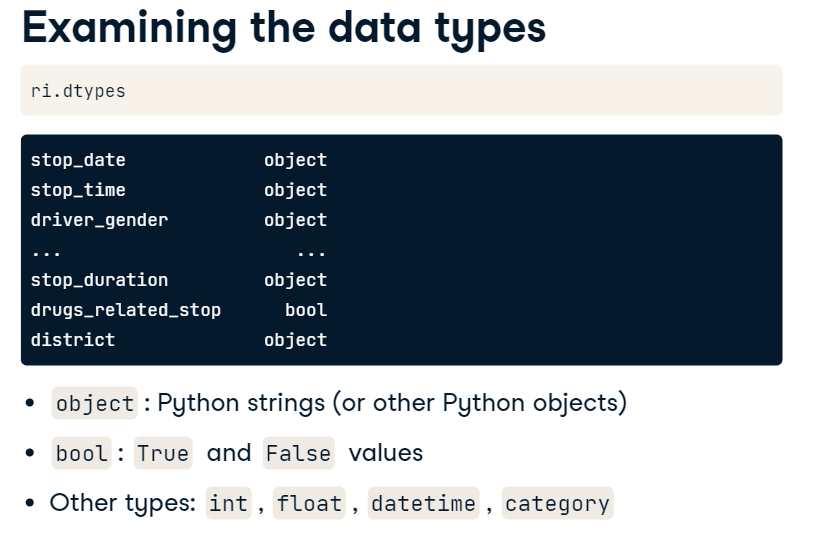

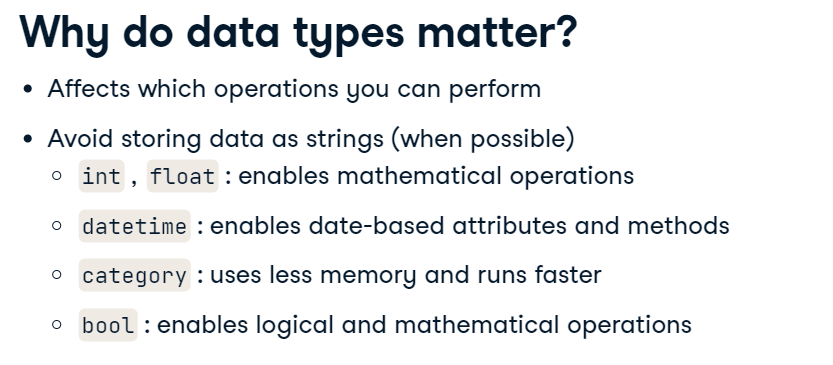

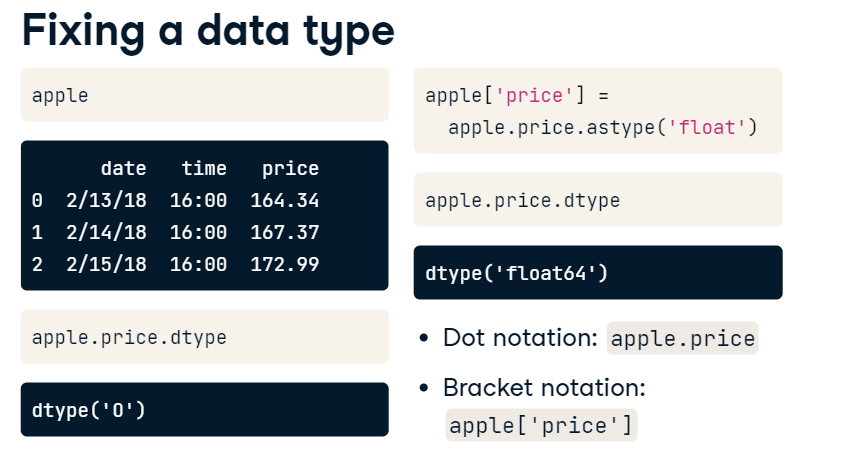

Let's see an example of how you might fix an improper data type. We'll imagine a DataFrame named apple that has a Series named price, which stores the closing price of Apple company stock each day. You can check the data type of the price Series using its dtype attribute. It reports a dtype of "O", which stands for object and means that the numbers are actually stored as strings. To change the data type of the price Series from object to float, you can use the astype() method, to which you pass the new data type as an argument. Then, you simply overwrite the original Series. If you check the data type again, you can see that it has changed to float. You might have noticed that on the right side of the equals sign, I used dot notation to refer to the price Series, rather than bracket notation. They mean the same thing, but I'll be using dot notation throughout this course, because I find that dot notation makes pandas code more readable. However, it's worth noting that you must use bracket notation on the left side of an assignment statement to create a new Series or overwrite an existing Series.

In [ ]:
# The int and float data types are only suitable for purely numeric columns.
# The bool data type is suitable for columns that contain True and False values.
# The object data type is suitable for string values.

In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())



0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [ ]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')



In [ ]:
# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [ ]:
ri.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00


In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [ ]:
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [ ]:
#this is known as method chaining 
ri.stop_outcome.value_counts().sum()

86536

In [ ]:
# what if you wanted % 
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [ ]:
#VERY IMPORTANT 
#subsetting then getting a method chaining going on 
asian = ri[ri.driver_race=='Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

In [ ]:
#DOES GENDER PLAY A ROLE IN TRAFFICVIOLATIONS 
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [ ]:
type(female)

pandas.core.frame.DataFrame

In [ ]:
# Does gender affect who gets a ticket for speeding?

femaleandarrested=ri[(ri.driver_gender=='F')&(ri.is_arrested==True)]


In [ ]:
femaleandarrested.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-10-05 03:00:00,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2
2005-10-06 21:50:00,2005-10-06,21:50,F,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone X4
2005-10-10 17:50:00,2005-10-10,17:50,F,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K3


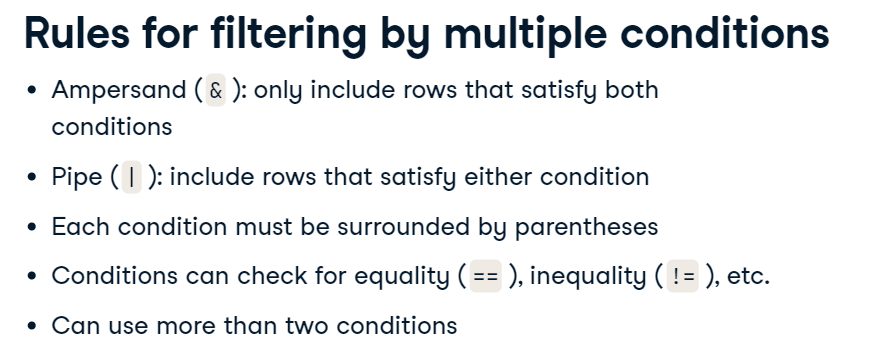

In [ ]:
#further subestting 
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [ ]:
# # Does gender affect whose vehicle is searched?
# works with non boolean columns as well 
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [ ]:
#only works with boolean columns 
ri.is_arrested.mean()

0.0355690117407784

In [ ]:
#using groupby 
#arrest types by districts 
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [ ]:
ri.is_arrested.mean()

0.0355690117407784

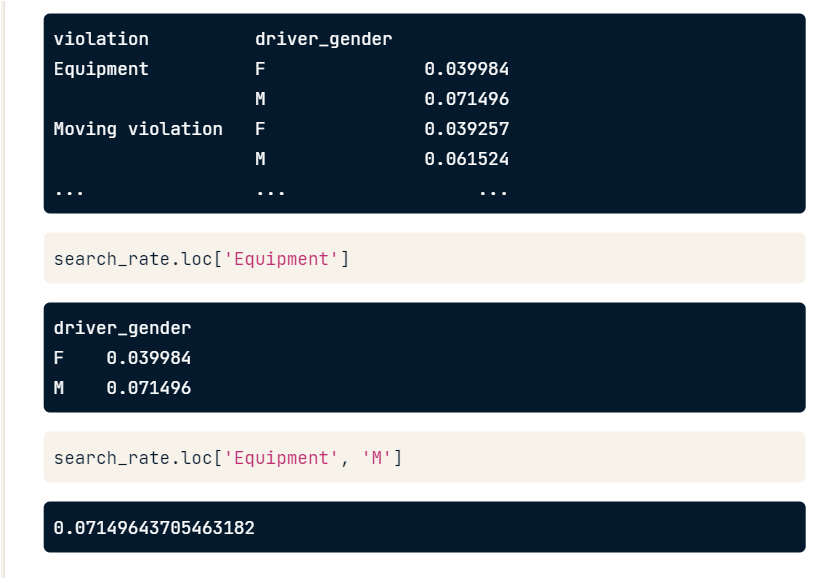

the above output is a multiindex pandas series 
unstacking it results in a data frame 
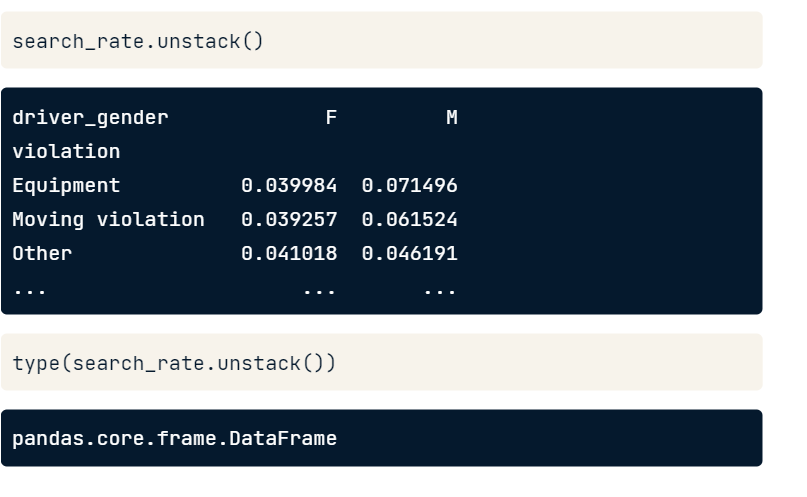

similar outputs can be crated by the pivot table 
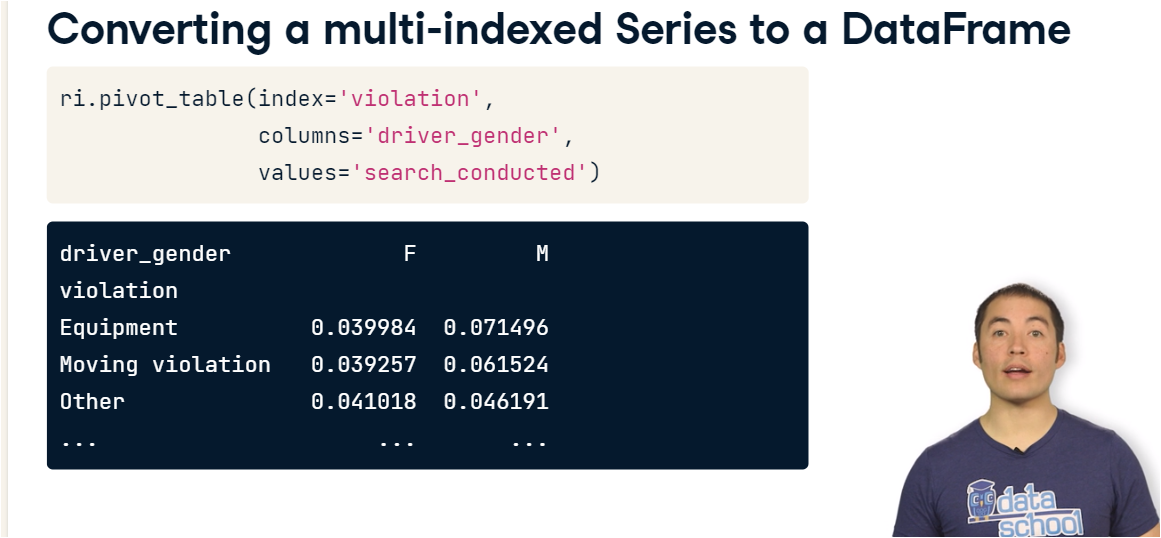

In [ ]:
#groupby multiple categories at once 
ri.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [ ]:
#reversing the presentation of the grouping 
ri.groupby(['driver_gender','district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

In [ ]:
#Calculating the search rate
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963953
True     0.036047
Name: search_conducted, dtype: float64
0.03604713268876511


In [ ]:
#comparing search rates by gender 
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.019180617481282074
0.04542557598546892


In [ ]:
#the above can be done at once 
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [ ]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


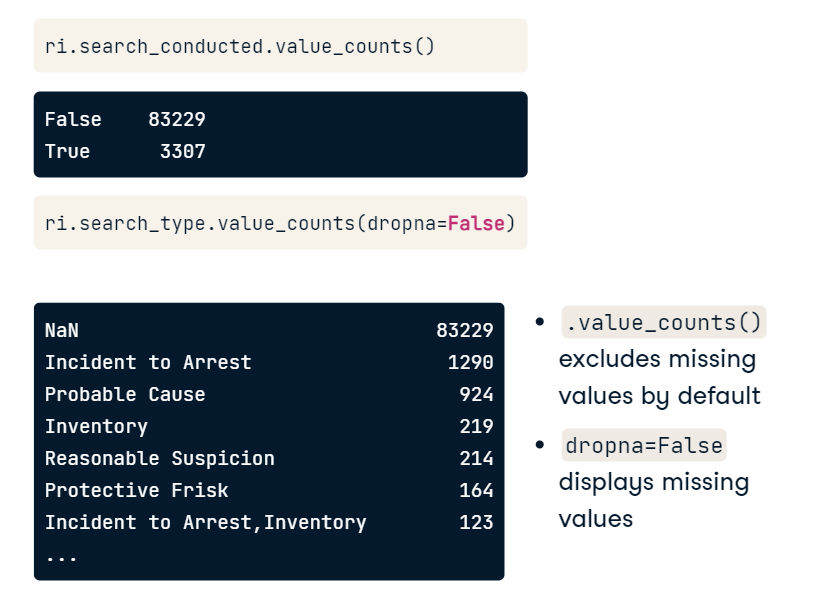

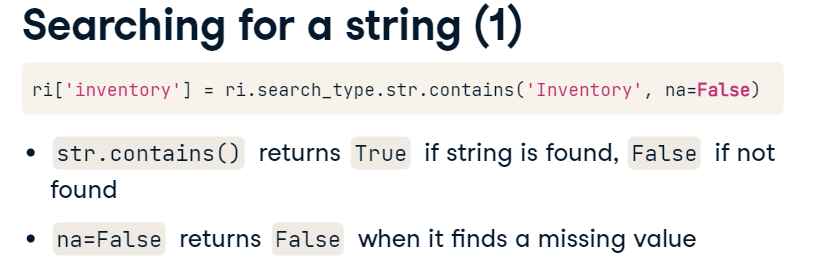

In [ ]:
# During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

# In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

In [ ]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [ ]:


# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

bool
303


In [ ]:
# Nice job! It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [ ]:
print(searched.frisk.mean())

0.09162382824312065


In [ ]:
##Calculating the hourly arrest rate

# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [ ]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

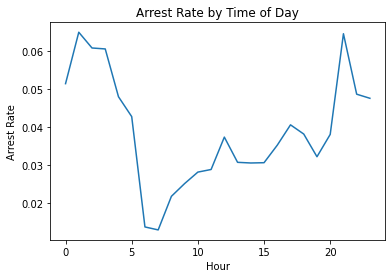

In [ ]:

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [ ]:
# # Are drug-related stops on the rise?
# Got It!
# 1. Are drug-related stops on the rise?
# In the last section, we created a plot to help us see how a single variable changed over time. In this section, we'll use subplots to help us examine the relationship between two variables over time.

# 2. Resampling the price
# Let's return to our DataFrame of Apple stock prices. In the last section, we calculated the mean price for each month using a groupby() operation. There's actually an alternative method, known as resampling, that we can use to accomplish the same task. As you might remember from previous courses, resampling is when you change the frequency of your time series observations. In this case, we'll resample the price column by month, represented by the capital letter M, and then chain the mean() method onto the end. The output is identical to the groupby() operation, except that the index consists of the last day of each month, rather than just the integers 1, 2, and 3.

# 3. Resampling the volume
# As a reminder, the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. Let's resample that column, to calculate the mean daily volume for each month. One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

# 4. Concatenating price and volume
# Now that we've resampled both the price and volume data, we're going to combine the results into a single DataFrame so that we can study the relationship between price and volume. First, we'll save the two resampled Series as separate objects. One is called monthly_price and the other is called monthly_volume. Then, we'll combine these two objects using the concat() function, which concatenates pandas objects along a specified axis. In this case, we want them to be combined along the columns axis, meaning that we want them side-by-side. Notice that they aligned along their shared index. We'll save this new DataFrame as an object called monthly.

# 5. Plotting price and volume (1)
# To visualize the relationship between price and volume, we simply call the plot() method on the monthly DataFrame. pandas outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

# 6. Plotting price and volume (2)
# The solution to this problem is to set the subplots parameter to True, which results in two separate plots with independent y axes. Now we can clearly see the monthly trends for both price and volume. They appear to have an inverse relationship, though we wouldn't actually draw that conclusion without having a lot more data.

# 7. Let's practice!
# Now it's time for you to practice resampling, concatenation, and subplots while you examine drug-related traffic stops in our dataset.

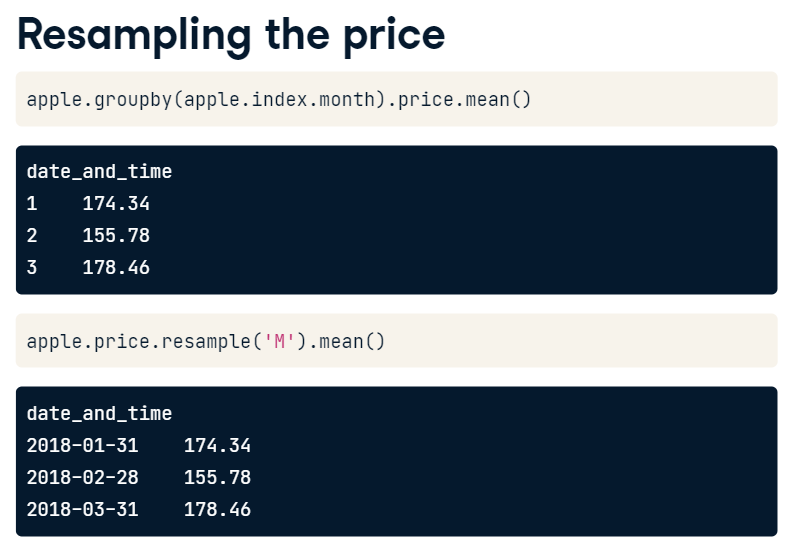

In [ ]:
#above outputs are identical except the indexes 

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


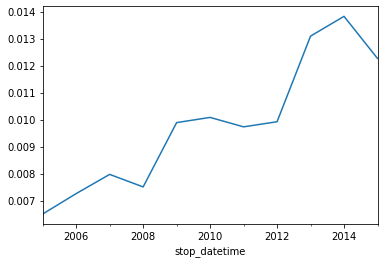

In [ ]:
#The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

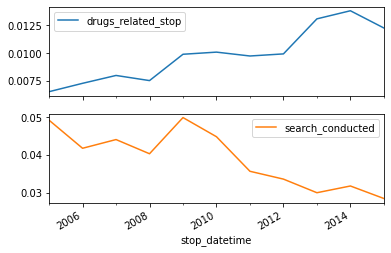

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [ ]:
# Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

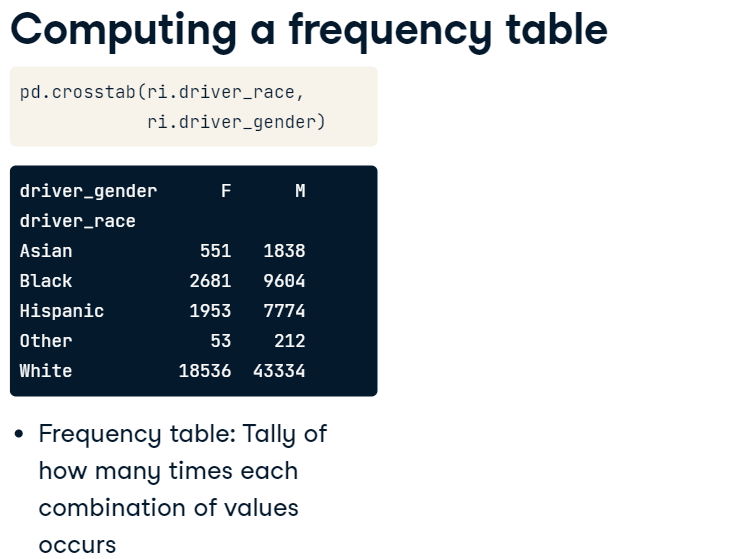

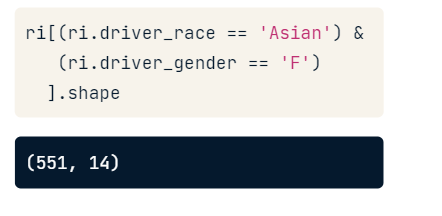

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))


violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]


In [ ]:
pd.crosstab(ri.district, ri.violation,normalize=True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,0.007766,0.014491,0.003351,0.001387,0.000000,0.068873
Zone K2,0.023817,0.034229,0.010886,0.008875,0.005558,0.120736
Zone K3,0.026602,0.033489,0.008147,0.008031,0.007373,0.142392
Zone X1,0.003421,0.007754,0.001652,0.000439,0.000855,0.012931
Zone X3,0.023678,0.035661,0.008886,0.007754,0.009476,0.101449
Zone X4,0.040919,0.061859,0.018027,0.016305,0.009742,0.113190


In [ ]:


# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]
violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


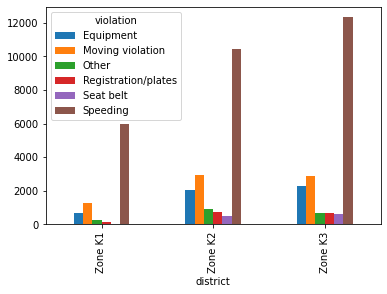

In [ ]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

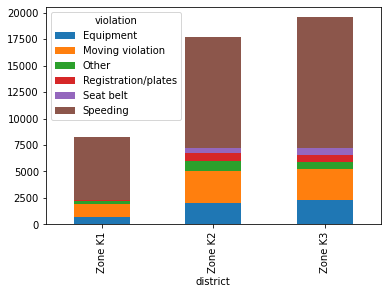

In [ ]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

In [ ]:
# # Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


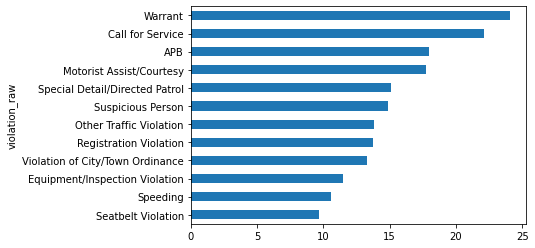

In [ ]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


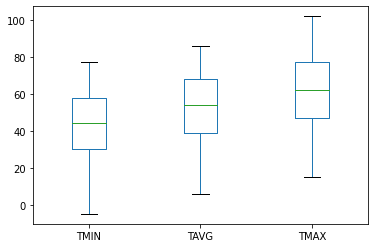

In [ ]:


# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


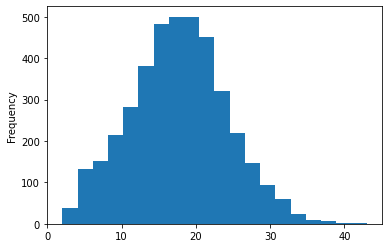

In [ ]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

In [ ]:
# Great work! The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

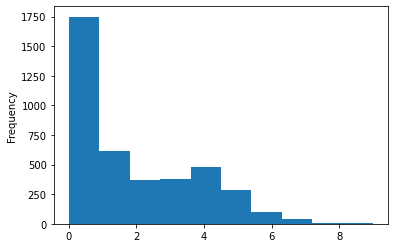

In [ ]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [ ]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime  index state  ... stop_duration drugs_related_stop  district
0 2005-01-04 12:55:00      0    RI  ...      0-15 Min              False   Zone X4
1 2005-01-23 23:15:00      1    RI  ...      0-15 Min              False   Zone K3
2 2005-02-17 04:15:00      2    RI  ...      0-15 Min              False   Zone X4
3 2005-02-20 17:15:00      3    RI  ...     16-30 Min              False   Zone X1
4 2005-02-24 01:20:00      4    RI  ...      0-15 Min              False   Zone X3

[5 rows x 17 columns]
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [ ]:
ri.head(4)

,index,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1


In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)



(91741, 16)
(91741, 18)


In [ ]:
ri_weather.columns


Index(['index', 'state', 'stop_date', 'stop_time', 'county_name',
       'driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district', 'DATE', 'rating'],
      dtype='object')

In [ ]:
combined = ri_weather.stop_date.str.cat(ri_weather.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri_weather['stop_datetime'] = pd.to_datetime(combined)




In [ ]:

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)


In [ ]:
ri_weather.dtypes

index                   int64
state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
DATE                   object
rating                 object
dtype: object

In [ ]:
ri_weather['is_arrested'] = ri_weather['is_arrested'].astype('bool')

In [ ]:
ri_weather.dtypes

index                   int64
state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested              bool
stop_duration          object
drugs_related_stop       bool
district               object
DATE                   object
rating                 object
dtype: object

In [ ]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()



In [ ]:
arrest_rate.head(2)

violation  rating
Equipment  bad       0.066311
           good      0.058995
Name: is_arrested, dtype: float64

In [ ]:
# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad       0.066311
                     good      0.058995
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076923
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013404
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
bad      0.013314
good     0.013404
worse    0.016886
Name: is_arrested, dtype: float64


In [ ]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.058995  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076923  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013404  0.016886
rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.058995  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076923  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013404  0.016886
